In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

In [3]:
dataset_train=pd.read_csv('^VIX.csv')
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-26,26.629999,29.570000,24.760000,27.559999,27.559999,0
1,2020-02-27,32.139999,39.310001,29.370001,39.160000,39.160000,0
2,2020-02-28,42.020000,49.480000,39.369999,40.110001,40.110001,0
3,2020-03-02,38.540001,40.410000,31.500000,33.419998,33.419998,0
4,2020-03-03,33.650002,41.060001,24.930000,36.820000,36.820000,0
...,...,...,...,...,...,...,...
248,2021-02-19,23.100000,23.190001,20.840000,22.049999,22.049999,0
249,2021-02-22,24.459999,25.090000,21.959999,23.450001,23.450001,0
250,2021-02-23,22.820000,27.010000,22.500000,23.110001,23.110001,0
251,2021-02-24,23.760000,25.040001,21.309999,21.340000,21.340000,0


In [4]:
training_set = dataset_train.iloc[:, 1:2].values

In [15]:
training_set[1]

array([32.139999])

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = []
y_train = []
for i in range(60, len(dataset_train)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
from google.colab import files
files.upload()

In [10]:
dataset_test = pd.read_csv('^VIX_2.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [11]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-12-26,19.370001,19.469999,18.600000,18.660000,18.660000,0
1,2007-12-27,19.150000,20.510000,19.150000,20.260000,20.260000,0
2,2007-12-28,19.590000,21.049999,19.440001,20.740000,20.740000,0
3,2007-12-31,21.870001,22.750000,21.790001,22.500000,22.500000,0
4,2008-01-02,22.580000,24.049999,22.400000,23.170000,23.170000,0
...,...,...,...,...,...,...,...
393,2009-07-20,25.059999,25.420000,24.260000,24.400000,24.400000,0
394,2009-07-21,24.280001,25.139999,23.809999,23.870001,23.870001,0
395,2009-07-22,24.049999,24.139999,23.240000,23.469999,23.469999,0
396,2009-07-23,23.709999,24.049999,23.209999,23.430000,23.430000,0


In [12]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

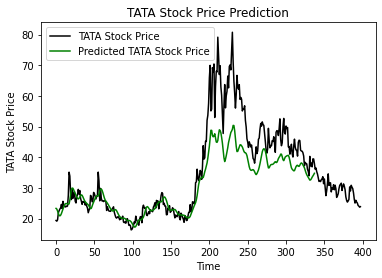

In [13]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()